In [1]:
#importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collinearity import SelectNonCollinear #imported this library to remove the Multi collinearity directly.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
client_data=pd.read_csv("D:\Softwares\Python_Env\BCG_Project\Project\client_data.csv")
price_data = pd.read_csv("D:\Softwares\Python_Env\BCG_Project\Project\price_data.csv")

Exploratory data analysis

Now, I will explore the data to gain insights about the data.

In [3]:
## view dimensions of dataset

client_data.shape

(14606, 26)

We can see that there are 14606 instances and 26 variables in the data set.

In [4]:
client_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [5]:
price_data.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [6]:
price_data.shape

(193002, 8)

In [7]:
# preview the dataset

client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [8]:
# preview the dataset
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
#Merging two datasets on the basis of id Feature

pricedata_indexed = price_data.set_index('id')
merged_data = client_data.join(pricedata_indexed, on='id')

In [10]:
## view dimensions of merged dataset

merged_data.shape

(175149, 33)

We can see that there are 175149 instances and 33 variables in the data set.

In [11]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [12]:
#Checking the null values in the merged data set
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, 0 to 14605
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_rent_12

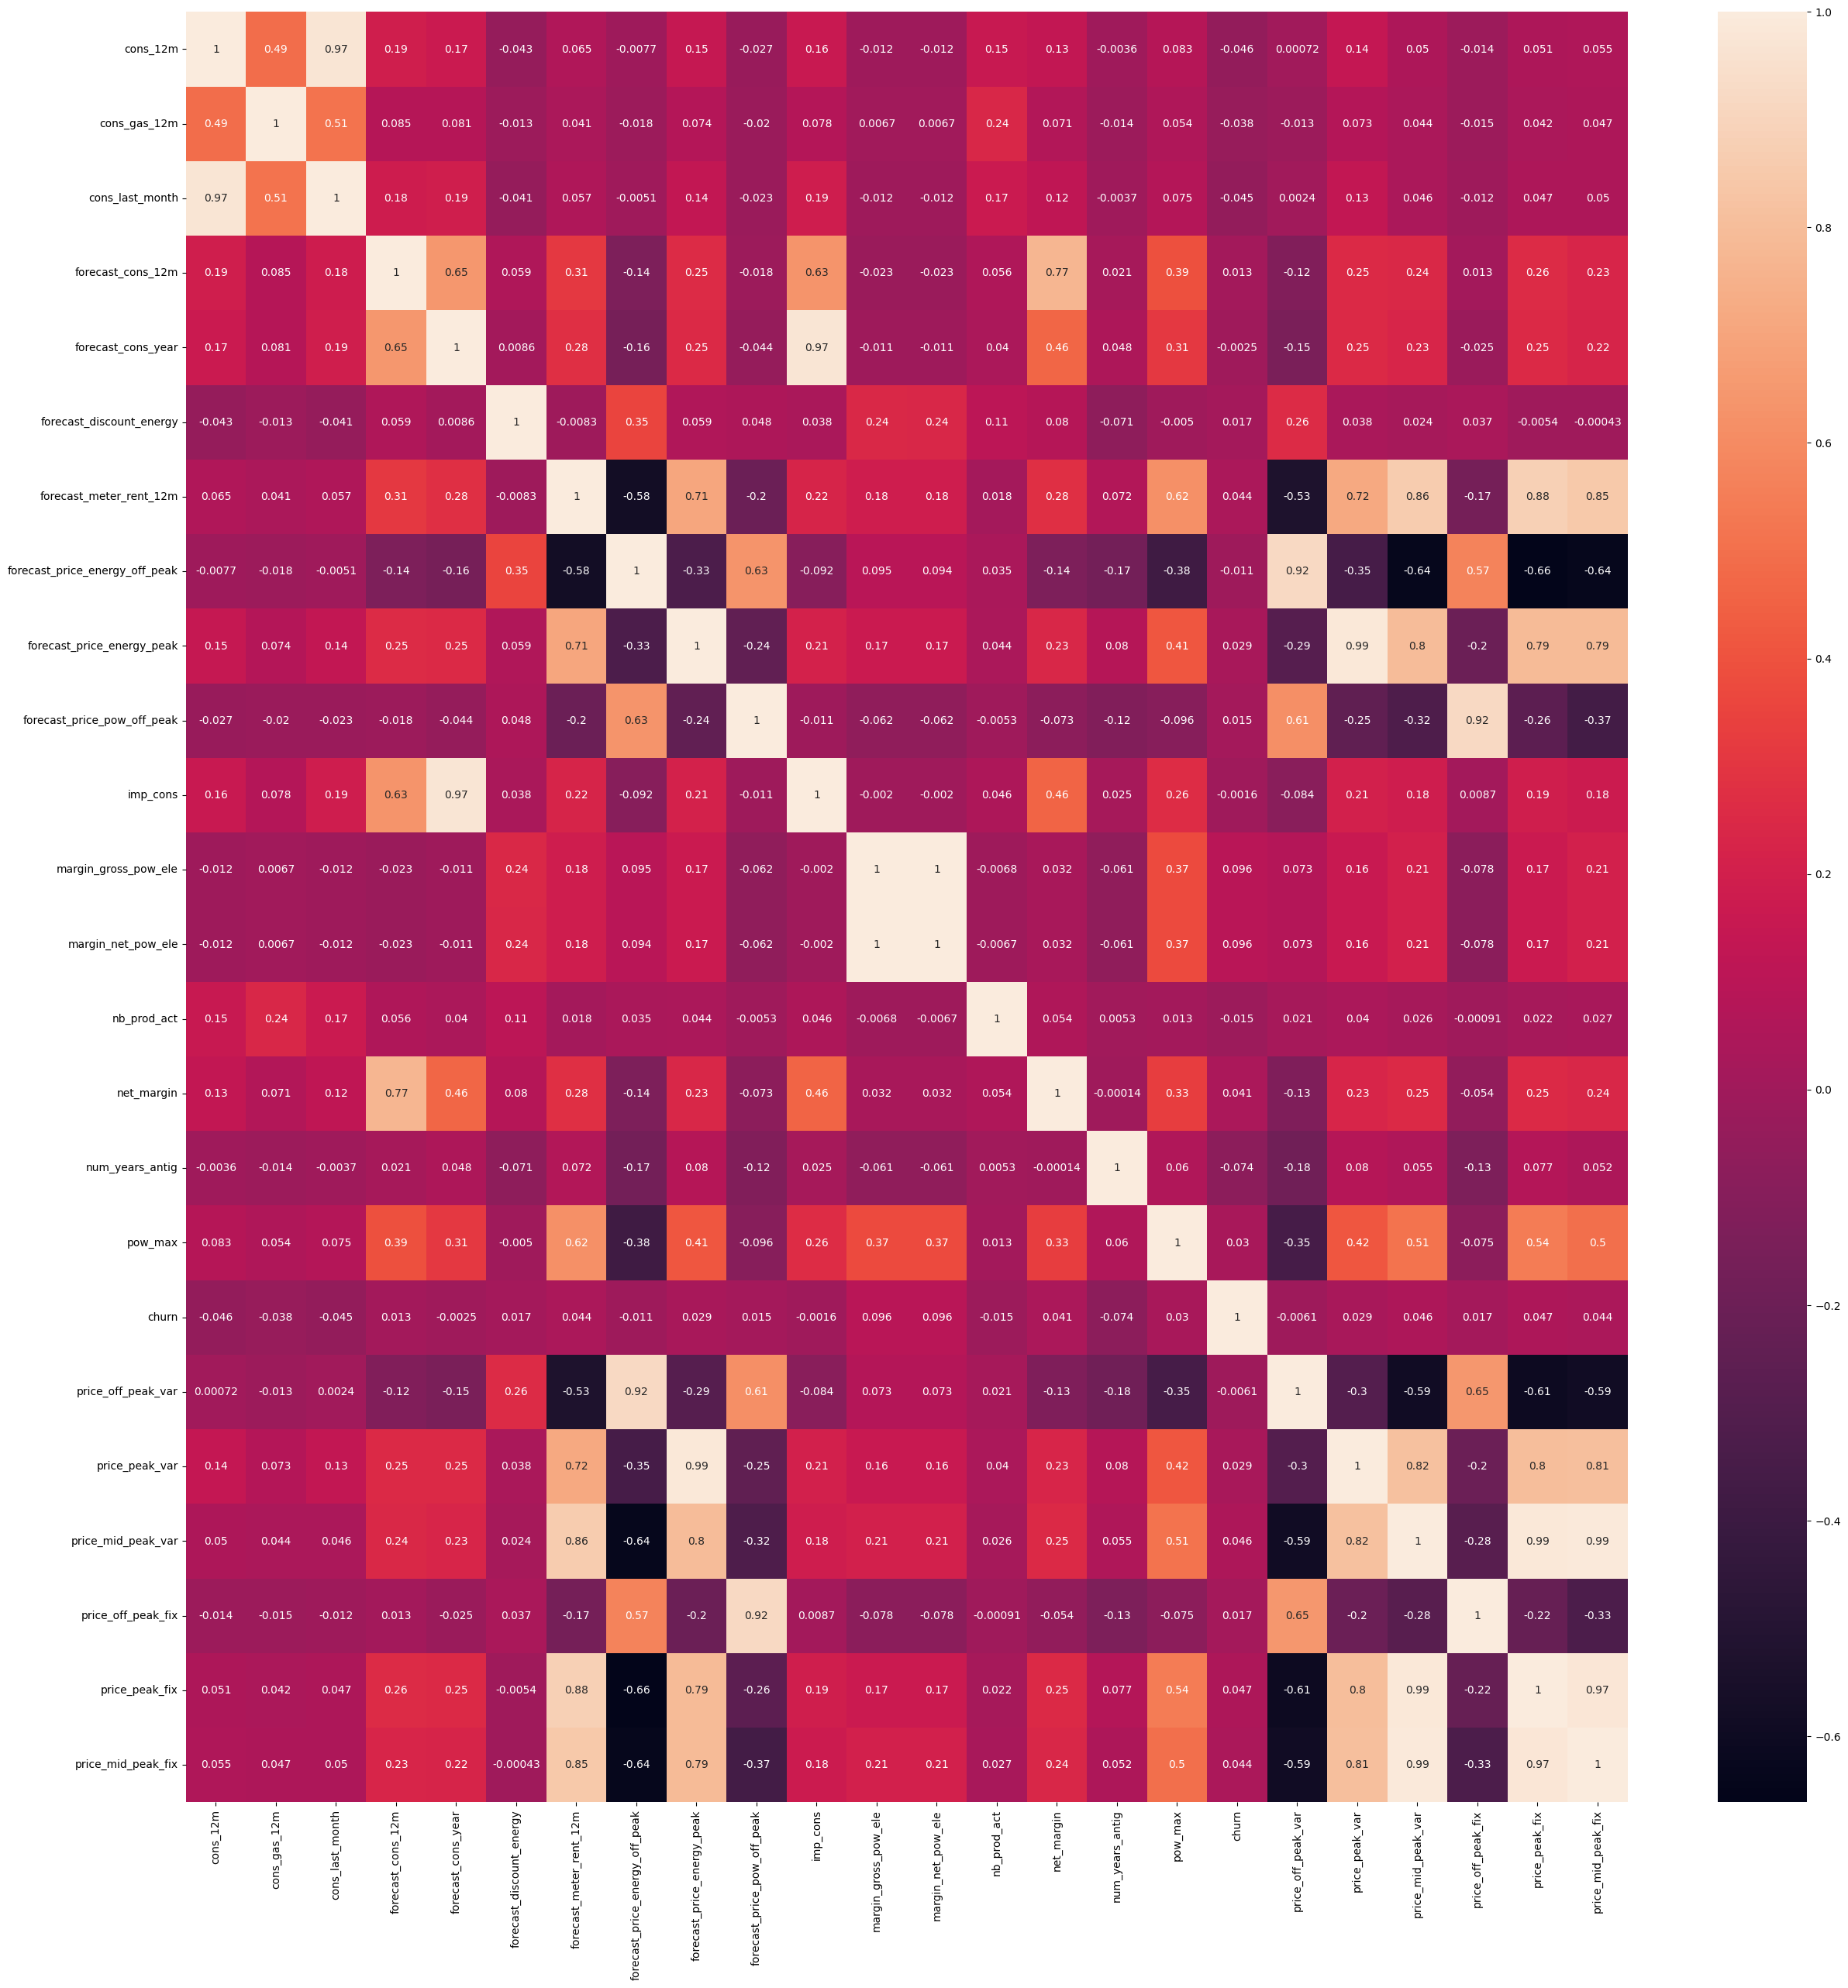

In [13]:
#taking numerical columns to check the correlation 

numerical_features = [var for var in merged_data.columns if merged_data[var].dtype=='int' or merged_data[var].dtype=='float']

numeric_df = merged_data[numerical_features]

plt.figure(figsize = (30,30))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()


In [14]:
#view summary of dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, 0 to 14605
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_rent_12

We can see that there is a Date variable which needs to be preprocessed

In [15]:
#Convert the date time columns into standardised datetime values

merged_data["date_activ"]= pd.to_datetime(merged_data["date_activ"])
merged_data["date_end"]= pd.to_datetime(merged_data["date_end"])
merged_data["date_modif_prod"]= pd.to_datetime(merged_data["date_modif_prod"])
merged_data["date_renewal"]= pd.to_datetime(merged_data["date_renewal"])
merged_data['price_date'] = pd.to_datetime(merged_data["price_date"])

In [16]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


We will be performing encoding on Data with data type as objects.


In [17]:
#Check the value counts
merged_data['id'].value_counts()

id
563dde550fd624d7352f3de77c0cdfcd    12
24011ae4ebbe3035111d65fa7c15bc57    12
d29c2c54acc38ff3c0614d0a653813dd    12
764c75f661154dac3a6c254cd082ea7d    12
bba03439a292a1e166f80264c16191cb    12
                                    ..
61022f00c0541d5cf95c5b16e20db0eb     9
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: count, Length: 14606, dtype: int64

In [18]:
merged_data['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: count, dtype: int64

We will be using label encoding for id feature and Map method for channel_sales feature

In [19]:
merged_data['channel_sales']=merged_data['channel_sales'].map({'foosdfpfkusacimwkcsosbicdxkicaua':0,'MISSING':1,'lmkebamcaaclubfxadlmueccxoimlema':2,'usilxuppasemubllopkaafesmlibmsdf':3,'ewpakwlliwisiwduibdlfmalxowmwpci':4,'sddiedcslfslkckwlfkdpoeeailfpeds':5,'epumfxlbckeskwekxbiuasklxalciiuu':6,'fixdbufsefwooaasfcxdxadsiekoceaa':7})

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'FUEL' column
merged_data['id'] = label_encoder.fit_transform(merged_data['id'])

In [21]:
merged_data['id'].value_counts()

id
4941     12
2117     12
12008    12
6715     12
10660    12
         ..
5542      9
3669      8
11258     7
10858     7
1250      7
Name: count, Length: 14606, dtype: int64

Now as we have converted the categorical values into numerical values, we will be replotting the heatmap to understand correlation between all the features.

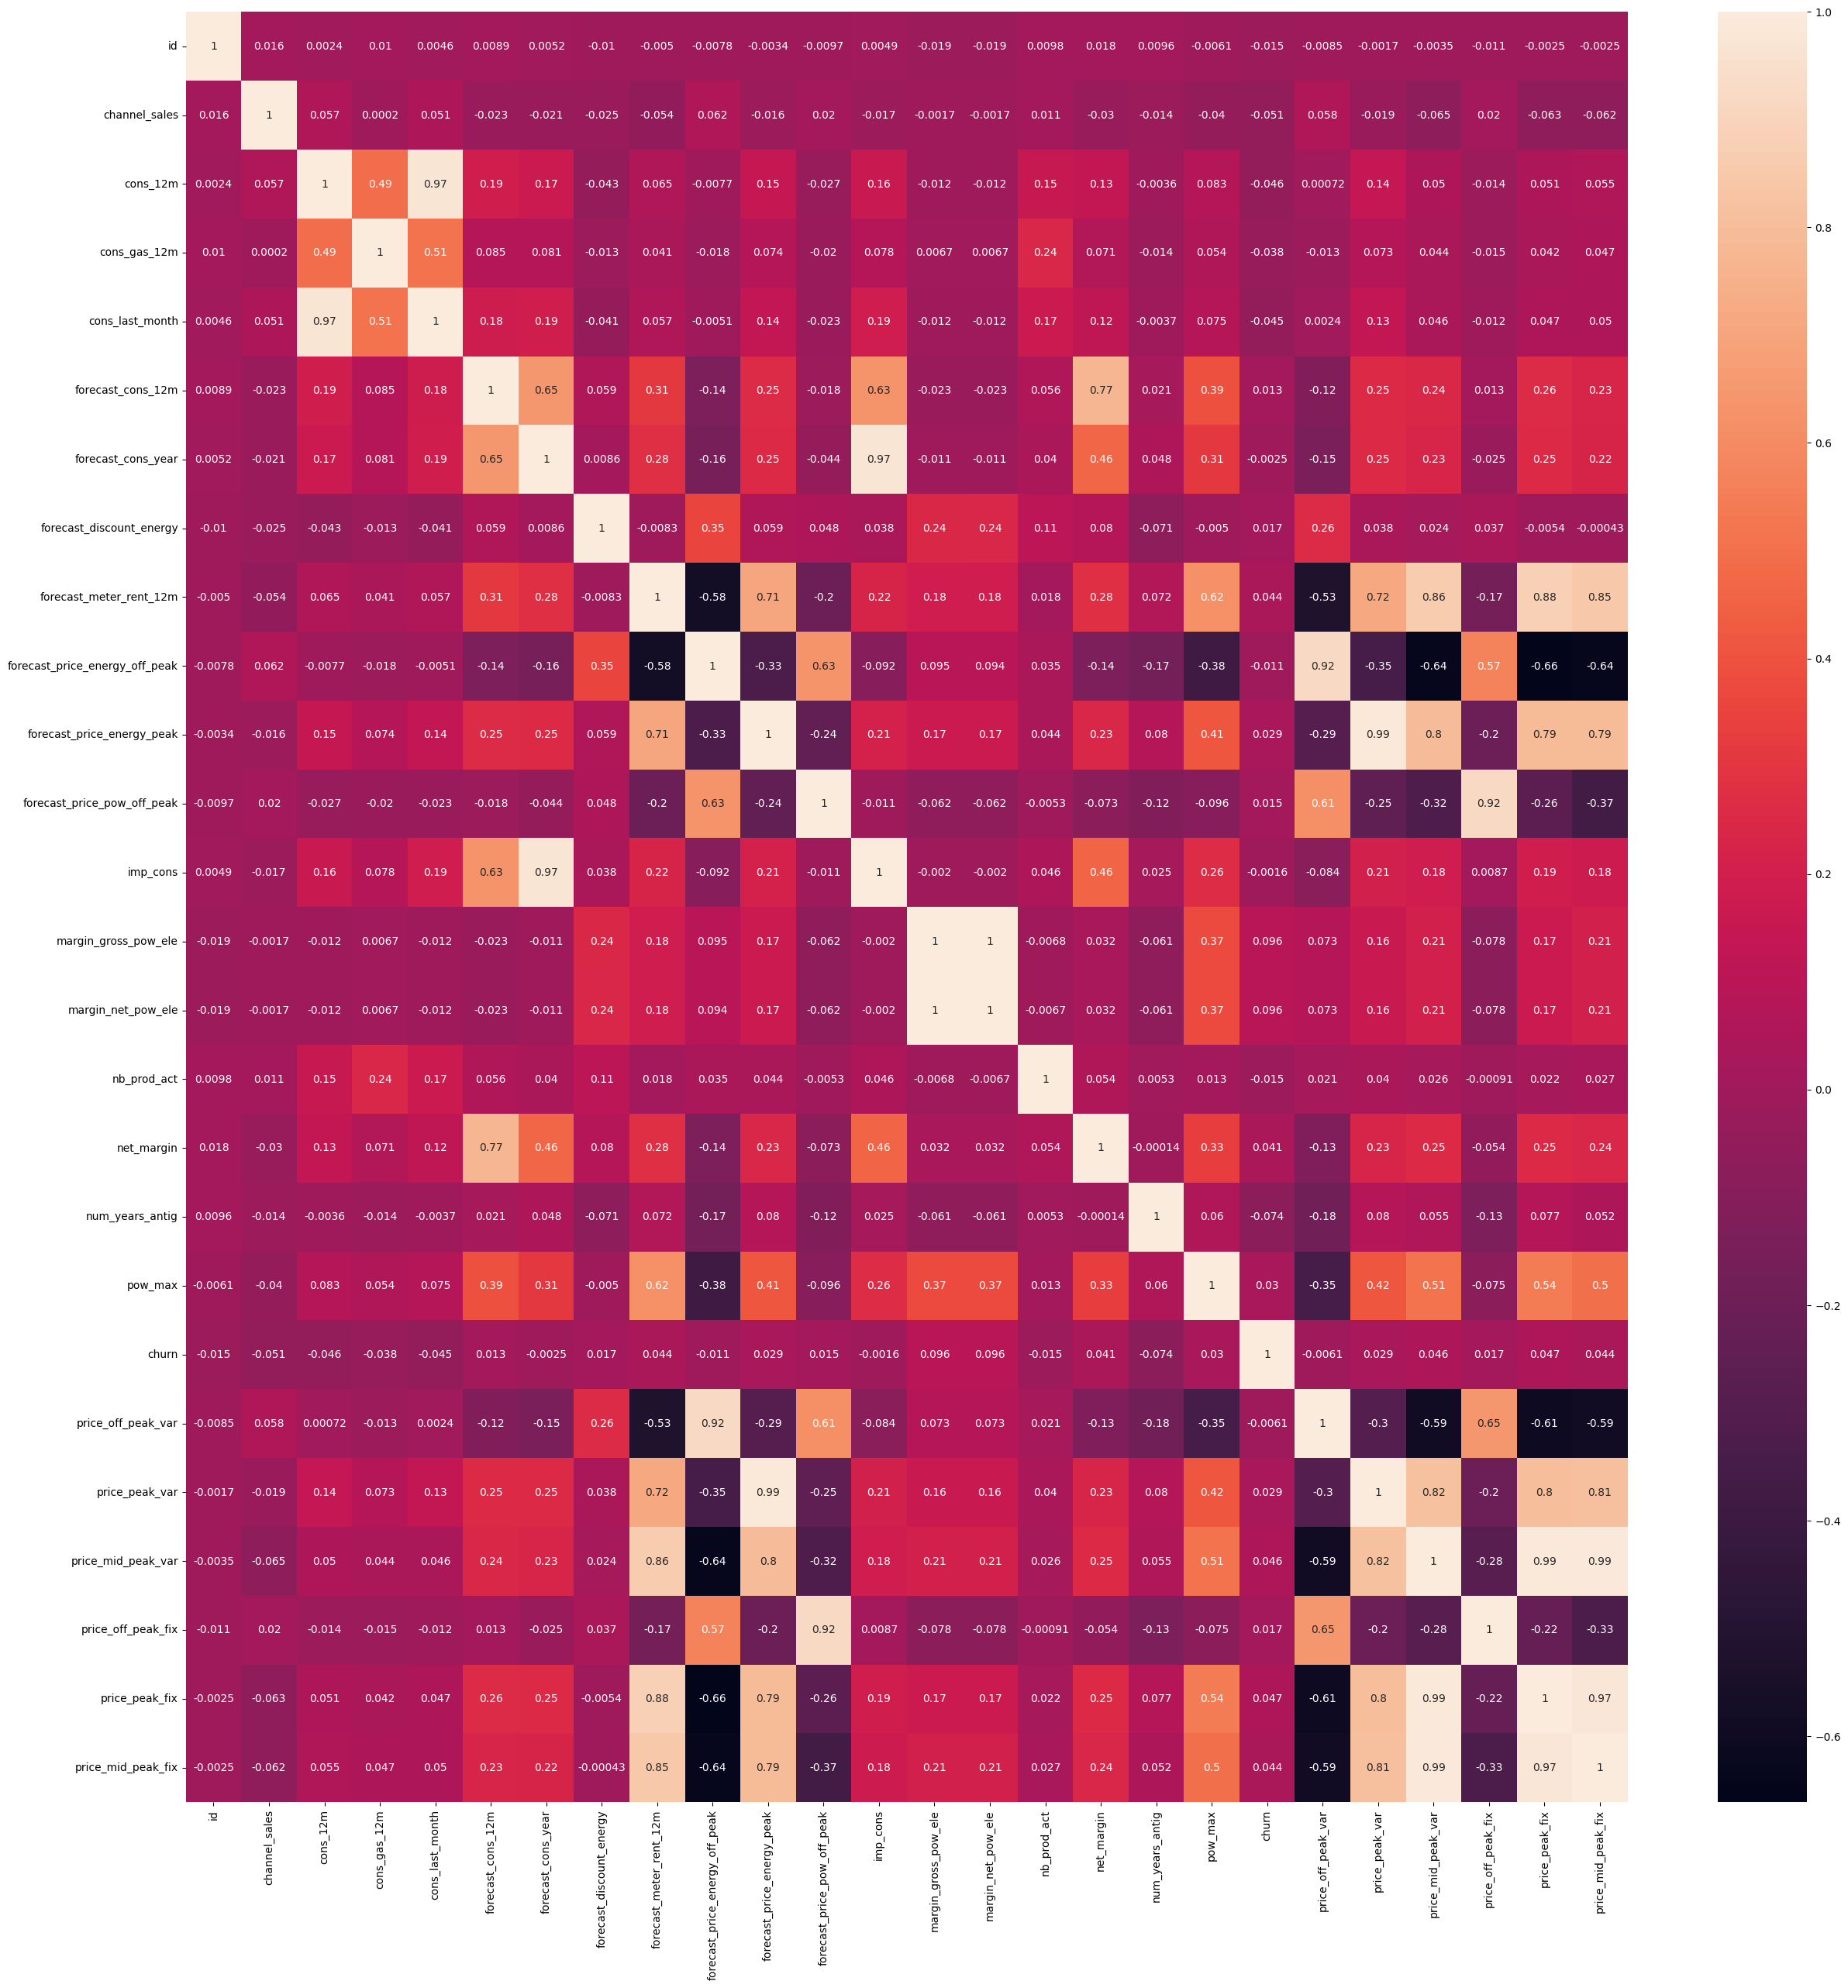

In [22]:
numerical_features = [var for var in merged_data.columns if merged_data[var].dtype=='int' or merged_data[var].dtype=='float']

numeric_df = merged_data[numerical_features]

plt.figure(figsize = (30,30))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

We can see that, there is multi collinearity between many features, we will dropping the features that are not required using result from VIF output


In [23]:
# to move the target variable at the last column
merged_data.insert(len(merged_data.columns) - 1,'churn',merged_data.pop('churn'))

In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, 0 to 14605
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  int64         
 1   channel_sales                   175149 non-null  int64         
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64        

In [25]:
numeric_df.insert(len(numeric_df.columns) - 1, 'churn',numeric_df.pop('churn'))

In [26]:
#Calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#Creating VIF DF

vif_df = pd.DataFrame()
vif_df['features'] = numeric_df.iloc[:,:-1].columns
X = numeric_df.iloc[:,:-1].values
vif_df['VIF'] = [vif(X, i)
                          for i in range(len(numeric_df.iloc[:,:-1].columns))]


vif_df = vif_df[vif_df['VIF'] < 10]

print(vif_df)

                    features       VIF
0                         id  3.936520
1              channel_sales  1.723663
3               cons_gas_12m  1.437812
5          forecast_cons_12m  5.909267
7   forecast_discount_energy  2.289554
8    forecast_meter_rent_12m  9.881517
15               nb_prod_act  4.619952
16                net_margin  3.468647
17           num_years_antig  9.746605
18                   pow_max  6.465030


We will be creating the new DF which will only be having the above features after removing dependent features using VIF method.

In [27]:
new_merged_df = merged_data[vif_df['features']]


In [28]:
new_merged_df.insert(len(new_merged_df.columns), 'churn',merged_data['churn'])

In [29]:
new_merged_df.head()

,id,channel_sales,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,2117,0,54946,0.0,0.0,1.78,2,678.99,3,43.648,1
0,2117,0,54946,0.0,0.0,1.78,2,678.99,3,43.648,1
0,2117,0,54946,0.0,0.0,1.78,2,678.99,3,43.648,1
0,2117,0,54946,0.0,0.0,1.78,2,678.99,3,43.648,1
0,2117,0,54946,0.0,0.0,1.78,2,678.99,3,43.648,1


In [30]:
new_unique_df = new_merged_df.drop_duplicates()

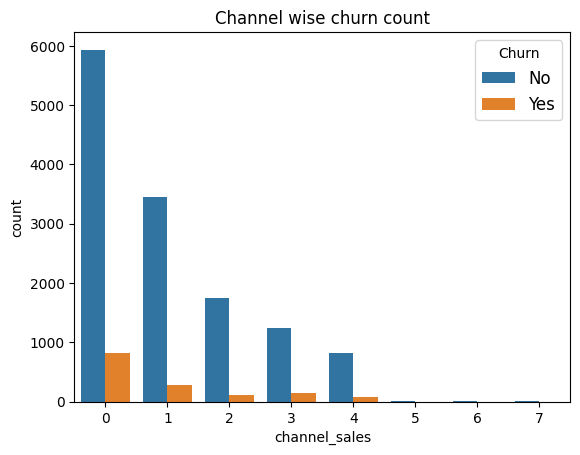

In [31]:
#Now we will be visualizing the data w.r.t Churn i.e will be using new_merged_df for analysis
#1. We will be creating subplots for analysing each feature with hue as churn
#fig, axes = plt.subplots(2,3,figsize = (10,6))
plt.title("Channel wise churn count")
sns.countplot(x= 'channel_sales',hue = 'churn', data = new_unique_df)
plt.legend(["No","Yes"],loc='upper right', title='Churn', fontsize='large', frameon=True)
plt.show()

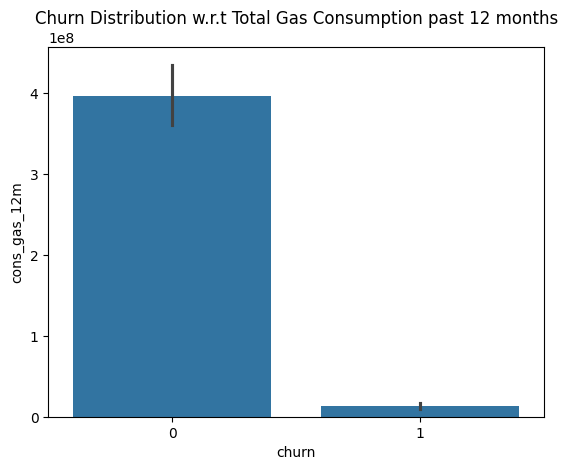

In [32]:
plt.title("Churn Distribution w.r.t Total Gas Consumption past 12 months")
sns.barplot(x="churn",y="cons_gas_12m",data=new_unique_df,estimator=sum)
#plt.legend(["No","Yes"],loc='upper right', title='Churn', fontsize='large', frameon=True)
plt.show()

In [33]:
new_unique_df['nb_prod_act']

0        2
1        1
2        1
3        1
4        1
        ..
14601    2
14602    1
14603    1
14604    1
14605    1
Name: nb_prod_act, Length: 14606, dtype: int64

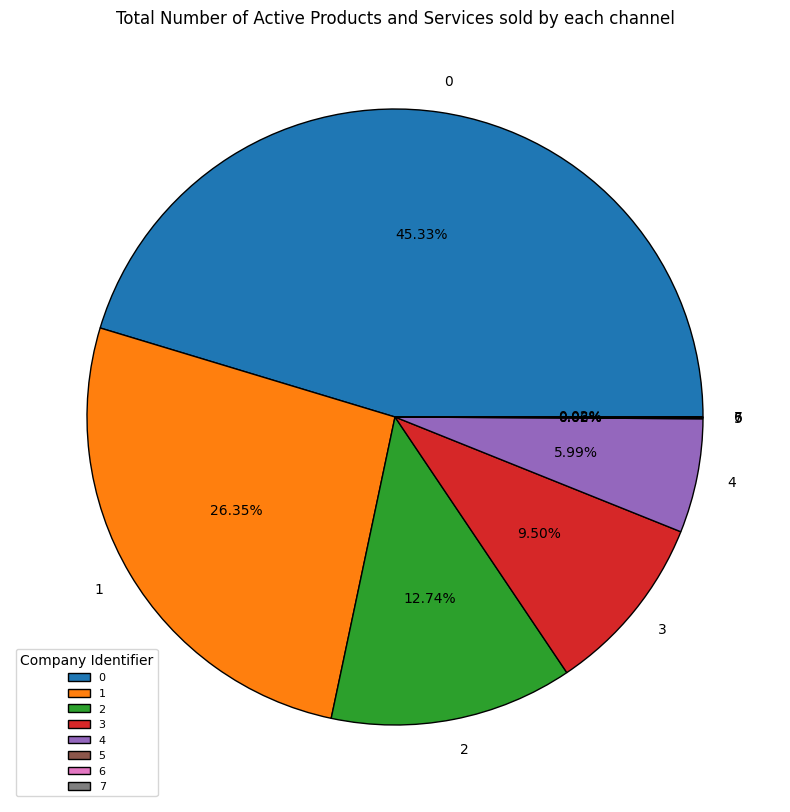

In [34]:
x = new_unique_df['nb_prod_act'].groupby(new_unique_df['channel_sales']).sum()
y = new_unique_df.sort_values(by = 'channel_sales')['channel_sales'].unique()
plt.figure(figsize = (14,10))
plt.pie(x,labels = y, shadow=False,autopct='%1.2f%%',wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title("Total Number of Active Products and Services sold by each channel")
plt.legend(title="Company Identifier",loc = 'lower left',fontsize = 8)
plt.show()

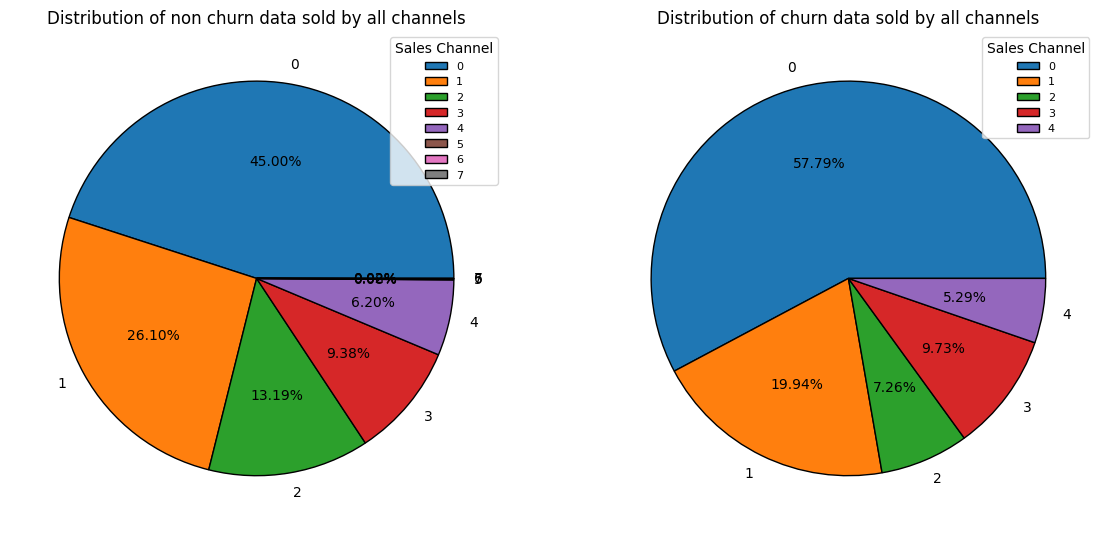

In [35]:
fig, (axes1, axes2) = plt.subplots(1,2,figsize=(14,10))
x_churn_n=new_unique_df[new_unique_df['churn'] == 0].groupby(new_unique_df['channel_sales']).count()
x_churn_y=new_unique_df[new_unique_df['churn'] == 1].groupby(new_unique_df['channel_sales']).count()
y=new_unique_df.sort_values(by = 'channel_sales')['channel_sales'].unique()
#plt.show
axes1.pie(x_churn_n['churn'],labels = y, shadow=False,autopct='%1.2f%%',wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
axes1.set_title("Distribution of non churn data sold by all channels")
axes1.legend(title="Sales Channel",loc = 'best',fontsize = 8)

axes2.pie(x_churn_y['churn'],labels = x_churn_y.index, shadow=False,autopct='%1.2f%%',wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
axes2.set_title("Distribution of churn data sold by all channels")
axes2.legend(title="Sales Channel",loc = 'best',fontsize = 8)
plt.show()

                        id  channel_sales   cons_gas_12m  forecast_cons_12m  \
channel_sales                                                                 
0              7282.236940            0.0   26117.274183        1879.312617   
1              7294.503196            1.0   28932.565660        1739.585413   
2              7403.390230            2.0   69777.177586        2477.626851   
3              7440.383185            3.0    9103.860954        1367.112474   
4              7409.566015            4.0   11610.282396        1626.338276   
5              7947.727273            5.0       0.000000        2152.671818   
6              1393.666667            6.0       0.000000        2697.370000   
7              9130.000000            7.0  237706.500000        1944.360000   

               forecast_discount_energy  forecast_meter_rent_12m  nb_prod_act  \
channel_sales                                                                   
0                              1.247893        

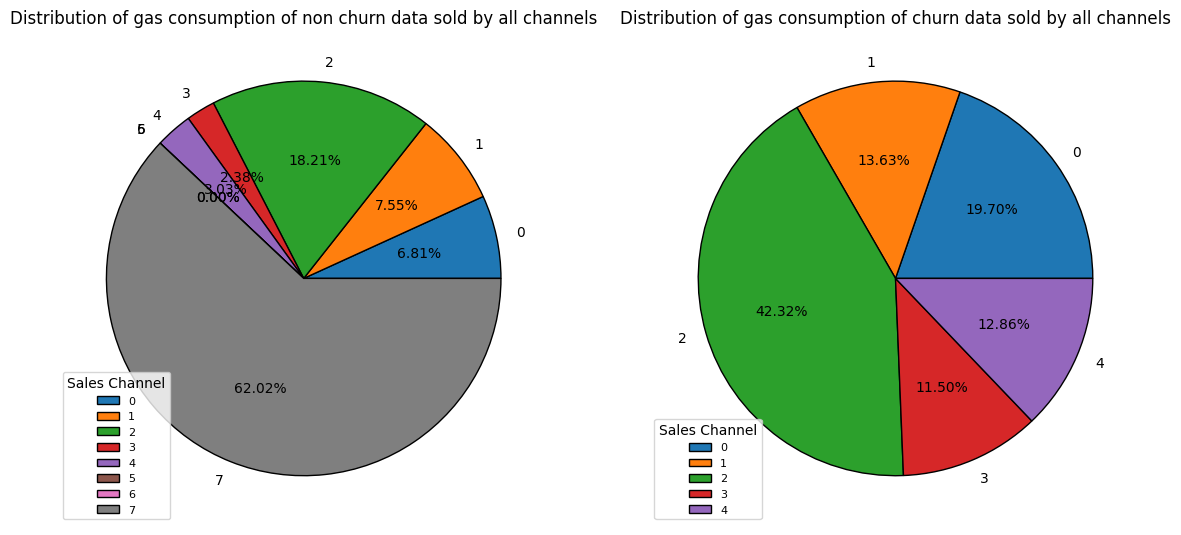

In [36]:
fig, (axes1, axes2) = plt.subplots(1,2,figsize=(14,10))
x_churn_n=new_unique_df[new_unique_df['churn'] == 0].groupby(new_unique_df['channel_sales']).mean()
x_churn_y=new_unique_df[new_unique_df['churn'] == 1].groupby(new_unique_df['channel_sales']).mean()
y=new_unique_df.sort_values(by = 'channel_sales')['channel_sales'].unique()
#plt.show

print(x_churn_n)
axes1.pie(x_churn_n['cons_gas_12m'],labels = y, shadow=False,autopct='%1.2f%%',wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
axes1.set_title("Distribution of gas consumption of non churn data sold by all channels")
axes1.legend(title="Sales Channel",loc = 'best',fontsize = 8)

axes2.pie(x_churn_y['cons_gas_12m'],labels = x_churn_y.index, shadow=False,autopct='%1.2f%%',wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
axes2.set_title("Distribution of gas consumption of churn data sold by all channels")
axes2.legend(title="Sales Channel",loc = 'best',fontsize = 8)
plt.show()

                        id  channel_sales   cons_gas_12m  forecast_cons_12m  \
channel_sales                                                                 
0              7282.236940            0.0   26117.274183        1879.312617   
1              7294.503196            1.0   28932.565660        1739.585413   
2              7403.390230            2.0   69777.177586        2477.626851   
3              7440.383185            3.0    9103.860954        1367.112474   
4              7409.566015            4.0   11610.282396        1626.338276   
5              7947.727273            5.0       0.000000        2152.671818   
6              1393.666667            6.0       0.000000        2697.370000   
7              9130.000000            7.0  237706.500000        1944.360000   

               forecast_discount_energy  forecast_meter_rent_12m  nb_prod_act  \
channel_sales                                                                   
0                              1.247893        

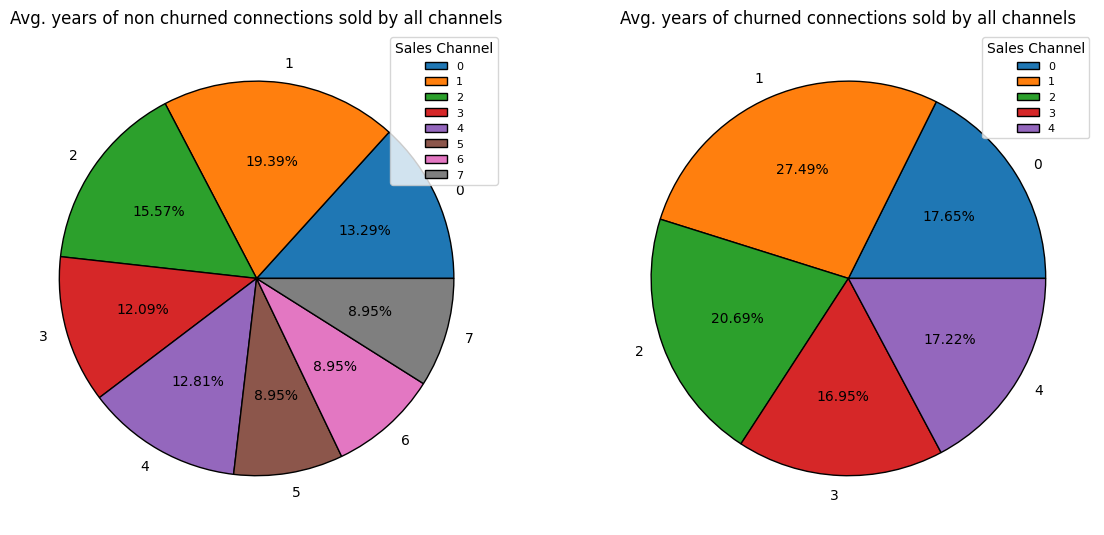

In [37]:
fig, (axes1, axes2) = plt.subplots(1,2,figsize=(14,10))
x_churn_n=new_unique_df[new_unique_df['churn'] == 0].groupby(new_unique_df['channel_sales']).mean()
x_churn_y=new_unique_df[new_unique_df['churn'] == 1].groupby(new_unique_df['channel_sales']).mean()
y=new_unique_df.sort_values(by = 'channel_sales')['channel_sales'].unique()
#plt.show

print(x_churn_n)
axes1.pie(x_churn_n['num_years_antig'],labels = y, shadow=False,autopct='%1.2f%%',wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
axes1.set_title("Avg. years of non churned connections sold by all channels")
axes1.legend(title="Sales Channel",loc = 'best',fontsize = 8)

axes2.pie(x_churn_y['num_years_antig'],labels = x_churn_y.index, shadow=False,autopct='%1.2f%%',wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
axes2.set_title("Avg. years of churned connections sold by all channels")
axes2.legend(title="Sales Channel",loc = 'best',fontsize = 8)
plt.show()

In [38]:
new_unique_df = new_unique_df.drop(columns = ['id'], axis = 1)

In [39]:
new_unique_df

,channel_sales,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0,54946,0.00,0.0,1.78,2,678.99,3,43.648,1
1,1,0,189.95,0.0,16.27,1,18.89,6,13.800,0
2,0,0,47.96,0.0,38.72,1,6.60,6,13.856,0
3,2,0,240.04,0.0,19.83,1,25.46,6,13.200,0
4,1,0,445.75,0.0,131.73,1,47.98,6,19.800,0
...,...,...,...,...,...,...,...,...,...,...
14601,0,47940,4648.01,0.0,18.57,2,381.77,4,15.000,0
14602,0,0,631.69,0.0,144.03,1,90.34,3,6.000,1
14603,0,0,190.39,0.0,129.60,1,20.38,4,15.935,1
14604,0,0,19.34,0.0,7.18,1,0.96,3,11.000,0


In [40]:
#Classification Model Training and Testing
from sklearn.model_selection import train_test_split
#Splitting the DF into training and testing


x = new_unique_df.iloc[:,:-1]
y = new_unique_df['churn']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
print(X_test)
print(X_train)

       channel_sales  cons_gas_12m  forecast_cons_12m  \
6171               0             0             212.71   
11147              4             0             662.13   
12081              1             0             959.61   
4929               1             0            2966.70   
3744               3             0             624.10   
...              ...           ...                ...   
2464               2             0            4865.95   
10317              3        867921            5803.20   
12815              1             0             575.24   
8843               0             0            1568.37   
14154              0             0            1074.03   

       forecast_discount_energy  forecast_meter_rent_12m  nb_prod_act  \
6171                        0.0                    17.90            1   
11147                       0.0                    16.26            1   
12081                       0.0                    17.31            1   
4929                   

In [42]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

print(X_test)
print(X_train)

[[0.         0.         0.00256577 ... 0.00084491 0.5        0.02226081]
 [0.57142857 0.         0.00798682 ... 0.00640764 0.16666667 0.02239343]
 [0.14285714 0.         0.01157512 ... 0.00369099 0.5        0.02239343]
 ...
 [0.14285714 0.         0.00693873 ... 0.00210332 0.41666667 0.03694348]
 [0.         0.         0.01891817 ... 0.00537715 0.41666667 0.03333123]
 [0.         0.         0.01295529 ... 0.00522819 0.41666667 0.08430692]]
[[1.42857143e-01 0.00000000e+00 4.89452531e-03 ... 1.66743656e-03
  3.33333333e-01 2.23934323e-02]
 [4.28571429e-01 0.00000000e+00 1.88726971e-03 ... 5.09958019e-04
  2.50000000e-01 2.23871171e-02]
 [0.00000000e+00 3.78135989e-04 2.70460007e-02 ... 6.95952285e-03
  2.50000000e-01 4.64161667e-02]
 ...
 [0.00000000e+00 0.00000000e+00 7.64854469e-02 ... 2.09709552e-02
  2.50000000e-01 3.12598674e-02]
 [2.85714286e-01 0.00000000e+00 4.08525258e-02 ... 1.58388158e-02
  1.66666667e-01 5.52099779e-02]
 [0.00000000e+00 0.00000000e+00 4.04763022e-02 ... 1.476


We will implement Logistic Regression with Python and Scikit-Learn. we build a Logistic Regression classifier to predict whether customer will churn or not. 

In [43]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [44]:
y_pred_test = logreg.predict(X_test)


In [45]:
print(y_pred_test)

[0 0 0 ... 0 0 0]


In [46]:
logreg.predict_proba(X_test)[:,0]

array([0.92683858, 0.91199378, 0.9350882 , ..., 0.92255163, 0.91364593,
       0.89519454])

In [47]:
logreg.predict_proba(X_test)[:,1]

array([0.07316142, 0.08800622, 0.0649118 , ..., 0.07744837, 0.08635407,
       0.10480546])

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9144


In [49]:
new_unique_df.churn.value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [50]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8999
Test set score: 0.9144


From the above model training, we can say that our model generated is overfitm, due to data i.e. we have biased data which has not been churned (Value count of Churn = 0, is 13187 and for Churn = 1, is 1419).

So, we need to retrain the model.

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.89987163 0.89987163 0.89987163 0.89987163 0.90025685]


In [52]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8999


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [53]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2672    0]
 [ 250    0]]

True Positives(TP) =  2672

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  250


<Axes: >

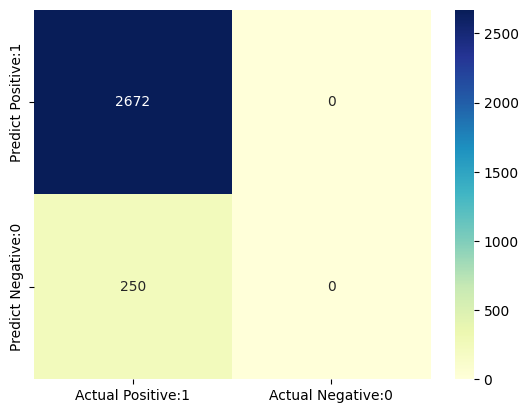

In [54]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      2672
           1       0.00      0.00      0.00       250

    accuracy                           0.91      2922
   macro avg       0.46      0.50      0.48      2922
weighted avg       0.84      0.91      0.87      2922



In [56]:
#biasness of churn data
new_unique_df.churn.value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

As our data is biased for handling this type of data we ll use following techniques:
***1. Resampling Techniques
**a. Oversampling the Minority Class:

SMOTE (Synthetic Minority Over-sampling Technique): This technique generates synthetic samples for the minority class. It’s effective for creating a more balanced dataset.

ADASYN (Adaptive Synthetic Sampling): An extension of SMOTE that focuses on generating more samples in regions where the minority class is sparse.

**b. Undersampling the Majority Class:
Random Undersampling: Randomly reduces the number of samples in the majority class. Be cautious as this can lead to loss of important data.
Tomek Links and Edited Nearest Neighbors: Techniques that can help in cleaning up the majority class while keeping the minority class intact.
**c. Combined Approach:

SMOTE + Tomek Links: Combining oversampling and cleaning techniques can often yield better results.

In [57]:
#importing libraries for resampling techniques
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE              #imbalanced library for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks

In [58]:

# 1. **Oversampling the Minority Class using SMOTE**

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

print("Original dataset shape:")
print(pd.Series(y_train).value_counts())
print("After SMOTE, dataset shape:")
print(pd.Series(y_resampled_smote).value_counts())

Original dataset shape:
churn
0    10515
1     1169
Name: count, dtype: int64
After SMOTE, dataset shape:
churn
1    13187
0    13187
Name: count, dtype: int64


Applying logistic regression on data after using smote sampling technique for handling biasness of data

In [59]:

#Classification Model Training and Testing
from sklearn.model_selection import train_test_split
#Splitting the DF into training and testing

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size = 0.2, random_state = 0)

In [60]:

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=0, solver='liblinear')

In [61]:
y_pred_smote = logreg.predict( X_test_smote)

In [62]:
print(y_pred_smote)

[0 0 1 ... 1 0 1]


In [63]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_smote, y_train_smote)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_smote, y_test_smote)))

Training set score: 0.5978
Test set score: 0.5941


Training and test score are similar but are very less so model after smote sampling is not acceptable.
also we are showing the confusion matrix for logistic regression using smote oversampling technique.

In [64]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_smote = confusion_matrix(y_test_smote, y_pred_smote)

print('Confusion matrix\n\n', cm_smote)

print('\nTrue Positives(TP) = ', cm_smote[0,0])

print('\nTrue Negatives(TN) = ', cm_smote[1,1])

print('\nFalse Positives(FP) = ', cm_smote[0,1])

print('\nFalse Negatives(FN) = ', cm_smote[1,0])

Confusion matrix

 [[1876  768]
 [1373 1258]]

True Positives(TP) =  1876

True Negatives(TN) =  1258

False Positives(FP) =  768

False Negatives(FN) =  1373


<Axes: >

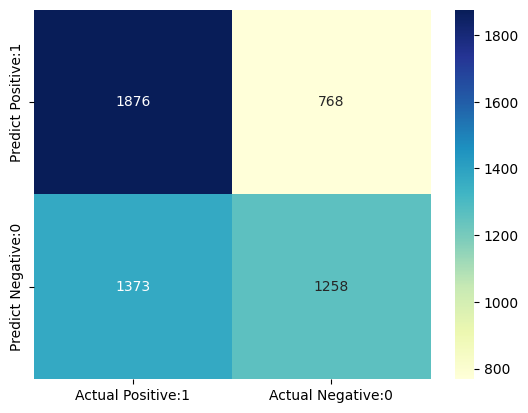

In [65]:
# visualize confusion matrix with seaborn heatmap

cm_smote_matrix = pd.DataFrame(data=cm_smote, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_smote_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [66]:
# 2. **Undersampling the Majority Class**

undersample = RandomUnderSampler(random_state=42)
X_resampled_undersample, y_resampled_undersample = undersample.fit_resample(x, y)

print("Original dataset shape:")
print(pd.Series(y_train).value_counts())
print("After Random Undersampling, dataset shape:")
print(pd.Series(y_resampled_undersample).value_counts())

Original dataset shape:
churn
0    10515
1     1169
Name: count, dtype: int64
After Random Undersampling, dataset shape:
churn
0    1419
1    1419
Name: count, dtype: int64


Applying logistic regression on data after using undersampling of majority class  sampling technique for handling biasness of data

In [67]:

#Splitting the DF into training and testing

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_resampled_undersample, y_resampled_undersample, test_size = 0.2, random_state = 0)

In [68]:
#Logistic Regression model for undersampling(Majority class)

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_undersample,  y_train_undersample)

LogisticRegression(random_state=0, solver='liblinear')

In [69]:
y_pred_undersample = logreg.predict(X_test_undersample)

In [70]:
print(y_pred_undersample)

[1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1
 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0
 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 

In [71]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_undersample,  y_train_undersample)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_undersample, y_test_undersample)))

Training set score: 0.5617
Test set score: 0.5352


In [72]:
cm_undersample = confusion_matrix(y_test_undersample,  y_pred_undersample)

print('Confusion matrix\n\n', cm_undersample)

print('\nTrue Positives(TP) = ', cm_undersample[0,0])

print('\nTrue Negatives(TN) = ', cm_undersample[1,1])

print('\nFalse Positives(FP) = ', cm_undersample[0,1])

print('\nFalse Negatives(FN) = ', cm_undersample[1,0])

Confusion matrix

 [[133 157]
 [107 171]]

True Positives(TP) =  133

True Negatives(TN) =  171

False Positives(FP) =  157

False Negatives(FN) =  107


<Axes: >

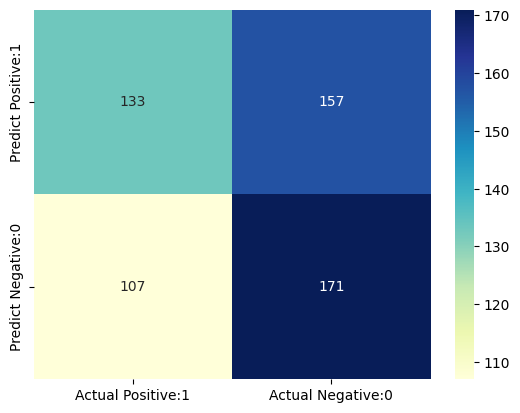

In [73]:
# visualize confusion matrix with seaborn heatmap

cm_undersample_matrix = pd.DataFrame(data=cm_undersample, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_undersample_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [74]:
# 3. **Combined Approach: SMOTE + Tomek Links**

tomek_links = TomekLinks()
smote_tomek_pipeline = Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                      ('tl', tomek_links)])

X_resampled_smote_tomek, y_resampled_smote_tomek = smote_tomek_pipeline.fit_resample(x, y)

print("Original dataset shape:")
print(pd.Series(y_train).value_counts())
print("After SMOTE + Tomek Links, dataset shape:")
print(pd.Series(y_resampled_smote_tomek).value_counts())

Original dataset shape:
churn
0    10515
1     1169
Name: count, dtype: int64
After SMOTE + Tomek Links, dataset shape:
churn
0    13187
1    12563
Name: count, dtype: int64


In [75]:

#Splitting the DF into training and testing

X_train_resampled_smote_tomek, X_test_resampled_smote_tomek, y_train_resampled_smote_tomek, y_test_resampled_smote_tomek= train_test_split(X_resampled_smote_tomek, y_resampled_smote_tomek, test_size = 0.2, random_state = 0)

In [76]:
#Model fitting for Combined Approach: SMOTE + Tomek Links sampling


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_resampled_smote_tomek,  y_train_resampled_smote_tomek)

LogisticRegression(random_state=0, solver='liblinear')

In [77]:
y_pred_resampled_smote_tomek = logreg.predict(X_test_resampled_smote_tomek)

In [87]:
print(y_pred_resampled_smote_tomek)

[1 0 0 ... 1 0 0]


In [89]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_resampled_smote_tomek,  y_train_resampled_smote_tomek)))

#print('Test set score: {:.4f}'.format(logreg.score(X_test_resampled_smote_tomek, y_test_undersample)))

Training set score: 0.5855


In [90]:
cm_resampled_smote_tomek = confusion_matrix(y_test_resampled_smote_tomek,  y_pred_resampled_smote_tomek)

print('Confusion matrix\n\n', cm_resampled_smote_tomek)

print('\nTrue Positives(TP) = ', cm_resampled_smote_tomek[0,0])

print('\nTrue Negatives(TN) = ', cm_resampled_smote_tomek[1,1])

print('\nFalse Positives(FP) = ', cm_resampled_smote_tomek[0,1])

print('\nFalse Negatives(FN) = ', cm_resampled_smote_tomek[1,0])

Confusion matrix

 [[2009  590]
 [1590  961]]

True Positives(TP) =  2009

True Negatives(TN) =  961

False Positives(FP) =  590

False Negatives(FN) =  1590


<Axes: >

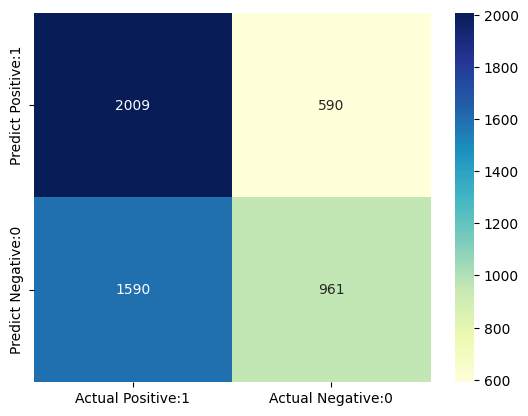

In [91]:
# visualize confusion matrix with seaborn heatmap

cm_resampled_smote_tomek_matrix = pd.DataFrame(data=cm_resampled_smote_tomek, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_resampled_smote_tomek_matrix, annot=True, fmt='d', cmap='YlGnBu')

Random Forest Modeling

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [84]:

x = new_unique_df.iloc[:,:-1]
y = new_unique_df['churn']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [85]:
#1. Oversampling using SMOTE technique

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

print("Original dataset shape:")
print(pd.Series(y_train).value_counts())
print("After SMOTE, dataset shape:")
print(pd.Series(y_resampled_smote).value_counts())

Original dataset shape:
churn
0    10515
1     1169
Name: count, dtype: int64
After SMOTE, dataset shape:
churn
1    13187
0    13187
Name: count, dtype: int64


In [87]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_resampled_smote)

X_test = scaler.transform(X_test)

print(X_test)
print(X_train)

[[0.         0.         0.00256577 ... 0.00084491 0.5        0.02226081]
 [0.57142857 0.         0.00798682 ... 0.00640764 0.16666667 0.02239343]
 [0.14285714 0.         0.01157512 ... 0.00369099 0.5        0.02239343]
 ...
 [0.14285714 0.         0.00693873 ... 0.00210332 0.41666667 0.03694348]
 [0.         0.         0.01891817 ... 0.00537715 0.41666667 0.03333123]
 [0.         0.         0.01295529 ... 0.00522819 0.41666667 0.08430692]]
[[0.00000000e+00 1.32253724e-02 0.00000000e+00 ... 2.76341896e-02
  1.66666667e-01 1.27401326e-01]
 [1.42857143e-01 0.00000000e+00 2.29123662e-03 ... 7.68803430e-04
  4.16666667e-01 3.31544048e-02]
 [0.00000000e+00 0.00000000e+00 5.78508599e-04 ... 2.68613162e-04
  4.16666667e-01 3.33312283e-02]
 ...
 [0.00000000e+00 0.00000000e+00 2.70764352e-02 ... 8.44987517e-03
  2.50000000e-01 3.22986394e-02]
 [2.85714286e-01 5.78155727e-04 1.03490506e-02 ... 3.77904910e-03
  2.50000000e-01 3.11561624e-02]
 [1.42857143e-01 0.00000000e+00 4.59693318e-02 ... 1.259

In [88]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [89]:
# Train the classifier
rf_classifier.fit(X_resampled_smote, y_resampled_smote)

RandomForestClassifier(random_state=42)

In [90]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [91]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [92]:
# Print the results
print(f"Accuracy:, {accuracy:2f}")
print("nClassification Report:\n",classification_rep)

Accuracy:, 0.914442
nClassification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96      2672
           1       0.00      0.00      0.00       250

    accuracy                           0.91      2922
   macro avg       0.46      0.50      0.48      2922
weighted avg       0.84      0.91      0.87      2922



In [93]:
cm_rf = confusion_matrix(y_test,  y_pred)

print('Confusion matrix\n\n', cm_rf)

print('\nTrue Positives(TP) = ', cm_rf[0,0])

print('\nTrue Negatives(TN) = ', cm_rf[1,1])

print('\nFalse Positives(FP) = ', cm_rf[0,1])

print('\nFalse Negatives(FN) = ', cm_rf[1,0])

Confusion matrix

 [[2672    0]
 [ 250    0]]

True Positives(TP) =  2672

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  250


<Axes: >

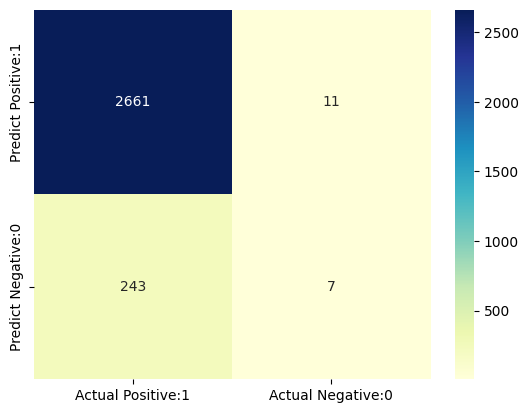

In [82]:
# visualize confusion matrix with seaborn heatmap

cm_rf_matrix = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_rf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [94]:
from xgboost import XGBClassifier
from sklearn import metrics

In [95]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')






In [107]:
X_resampled_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26374 entries, 0 to 26373
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   channel_sales             26374 non-null  int64  
 1   cons_gas_12m              26374 non-null  int64  
 2   forecast_cons_12m         26374 non-null  float64
 3   forecast_discount_energy  26374 non-null  float64
 4   forecast_meter_rent_12m   26374 non-null  float64
 5   nb_prod_act               26374 non-null  int64  
 6   net_margin                26374 non-null  float64
 7   num_years_antig           26374 non-null  int64  
 8   pow_max                   26374 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.8 MB


In [102]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_resampled_smote)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_resampled_smote,y_resampled_smote)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_resampled_smote,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_resampled_smote,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_resampled_smote,y_resampled_smote))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_resampled_smote,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_resampled_smote,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [103]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_resampled_smote,y_resampled_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [104]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9100250246454842
Accuracy on test set :  0.8812457221081451
Recall on training set :  0.8923181921589444
Recall on test set :  0.044
Precision on training set :  0.9250786163522012
Precision on test set :  0.09243697478991597


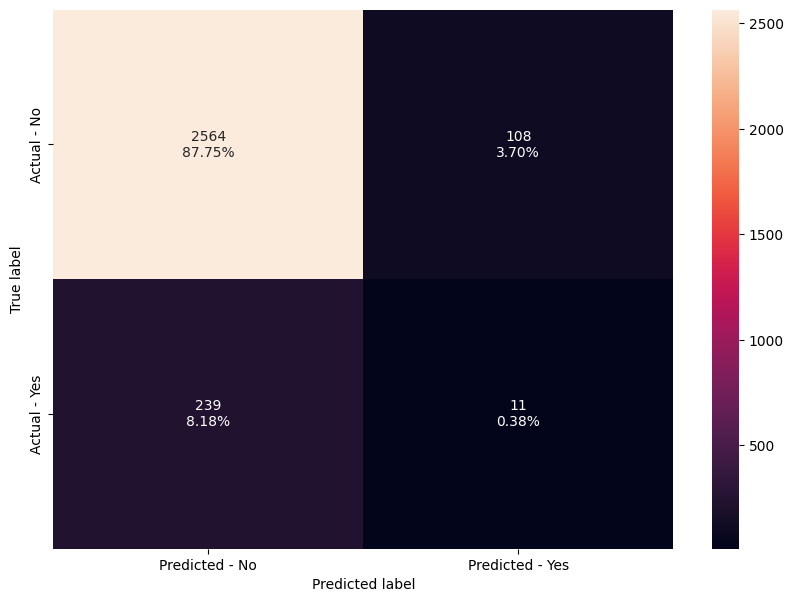

In [105]:
make_confusion_matrix(xgb,y_test)

In [106]:
import pickle
with open('random_forest_model_xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)